# JUDUL

## Project Overview

Proyek ini bertujuan untuk menyelidiki pengaruh dari tahapan pre-processing (pra-pemrosesan) data terhadap kinerja model machine learning dalam mendeteksi penipuan kartu kredit. Penipuan kartu kredit adalah masalah serius dalam industri keuangan, dan model machine learning yang efektif dapat membantu mendeteksi transaksi penipuan dengan lebih baik. Pre-processing data adalah langkah penting dalam mempersiapkan data sebelum memasukkannya ke dalam model. Tujuan proyek ini adalah untuk mengidentifikasi cara-cara pre-processing data dapat mempengaruhi kinerja model dalam mengatasi ketidakseimbangan data yang sering terjadi dalam kasus penipuan kartu kredit.

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [216]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [217]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


#### Load Data dari Kaggle

In [218]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

credit-card-fraud.zip: Skipping, found more recently modified local copy (use --force to force download)


#### Import Module

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [220]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import unzip_data

--2023-09-15 09:28:35--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-09-15 09:28:35 (70.3 MB/s) - ‘helper_functions.py.1’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [221]:
unzip_data("/content/credit-card-fraud.zip")

In [222]:
df = pd.read_csv('/content/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [223]:
df["fraud"].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

### Manip Data - Imbalance Data

In [224]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi dua DataFrame berdasarkan label
data_label_0 = df[df['fraud'] == 0]
data_label_1 = df[df['fraud'] == 1]

# Mengambil 100% data dengan label 0 dan 20% data dengan label 1
# Anda bisa mengatur proporsi yang sesuai dengan kebutuhan Anda
data_label_0_sampled = data_label_0.sample(frac=1.0, random_state=42)
data_label_1_sampled = data_label_1.sample(frac=0.8, random_state=42)

# Menggabungkan kembali data yang sudah diambil
df = pd.concat([data_label_0_sampled, data_label_1_sampled])
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,8.073065,0.614990,0.077806,1.0,0.0,0.0,1.0,0.0
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
157152,8.015637,4.319242,0.906554,1.0,0.0,0.0,1.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
846711,44.997072,10.943190,0.856966,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
593623,29.588257,66.519297,0.072054,1.0,0.0,0.0,1.0,1.0
70103,128.707098,0.308811,1.304773,1.0,0.0,0.0,1.0,1.0
668717,6.920051,0.402661,4.681969,1.0,1.0,0.0,1.0,1.0
28379,24.501468,12.169503,4.306104,1.0,0.0,0.0,1.0,1.0


### Manip Data - Membuat nilai yang hilang secara acak

In [225]:
# Membuat nilai yang hilang secara acak
missing_percentage = 0.05  # Persentase missing value yang diinginkan
total_missing_values = int(df.size * missing_percentage)
random_rows = np.random.randint(0, df.shape[0], total_missing_values)
random_columns = np.random.randint(0, df.shape[1] - 1, total_missing_values)  # Menghindari kolom terakhir

for row, col in zip(random_rows, random_columns):
    df.iat[row, col] = np.nan

# Menampilkan DataFrame yang telah dimodifikasi
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,8.073065,0.614990,NaN,1.0,0.0,0.0,1.0,0.0
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
157152,8.015637,NaN,NaN,1.0,0.0,0.0,1.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
846711,44.997072,10.943190,NaN,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
593623,29.588257,66.519297,0.072054,1.0,0.0,0.0,1.0,1.0
70103,128.707098,0.308811,1.304773,1.0,0.0,0.0,1.0,1.0
668717,6.920051,0.402661,4.681969,1.0,1.0,0.0,1.0,1.0
28379,24.501468,12.169503,4.306104,1.0,0.0,0.0,1.0,1.0


In [226]:
df.shape

(982519, 8)

In [227]:
data_missing = df.isnull().sum()
data_missing

distance_from_home                54723
distance_from_last_transaction    54624
ratio_to_median_purchase_price    54901
repeat_retailer                   54443
used_chip                         54493
used_pin_number                   54367
online_order                      54300
fraud                                 0
dtype: int64

### Imbalance Data

In [228]:
df["fraud"].unique()

array([0., 1.])

In [229]:
df["fraud"].value_counts()

0.0    912597
1.0     69922
Name: fraud, dtype: int64

<Axes: xlabel='fraud', ylabel='count'>

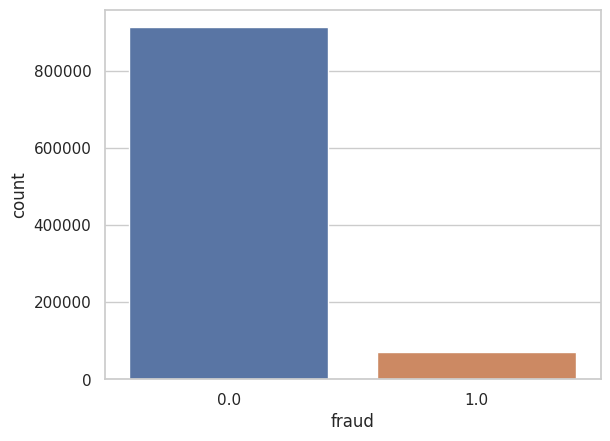

In [230]:
sns.countplot(x="fraud", data=df)

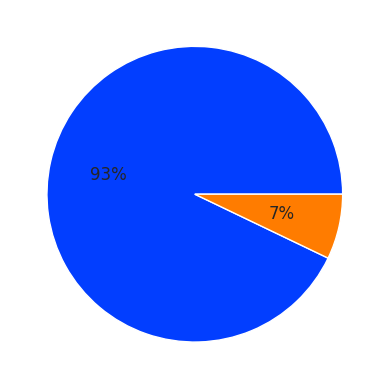

In [231]:
# declaring data
data = df["fraud"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

### Missing Data

In [232]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [233]:
df.shape

(982519, 8)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982519 entries, 763547 to 988548
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              927796 non-null  float64
 1   distance_from_last_transaction  927895 non-null  float64
 2   ratio_to_median_purchase_price  927618 non-null  float64
 3   repeat_retailer                 928076 non-null  float64
 4   used_chip                       928026 non-null  float64
 5   used_pin_number                 928152 non-null  float64
 6   online_order                    928219 non-null  float64
 7   fraud                           982519 non-null  float64
dtypes: float64(8)
memory usage: 67.5 MB


In [235]:
data_missing = df.isnull().sum()
data_missing

distance_from_home                54723
distance_from_last_transaction    54624
ratio_to_median_purchase_price    54901
repeat_retailer                   54443
used_chip                         54493
used_pin_number                   54367
online_order                      54300
fraud                                 0
dtype: int64

<Figure size 1000x600 with 0 Axes>

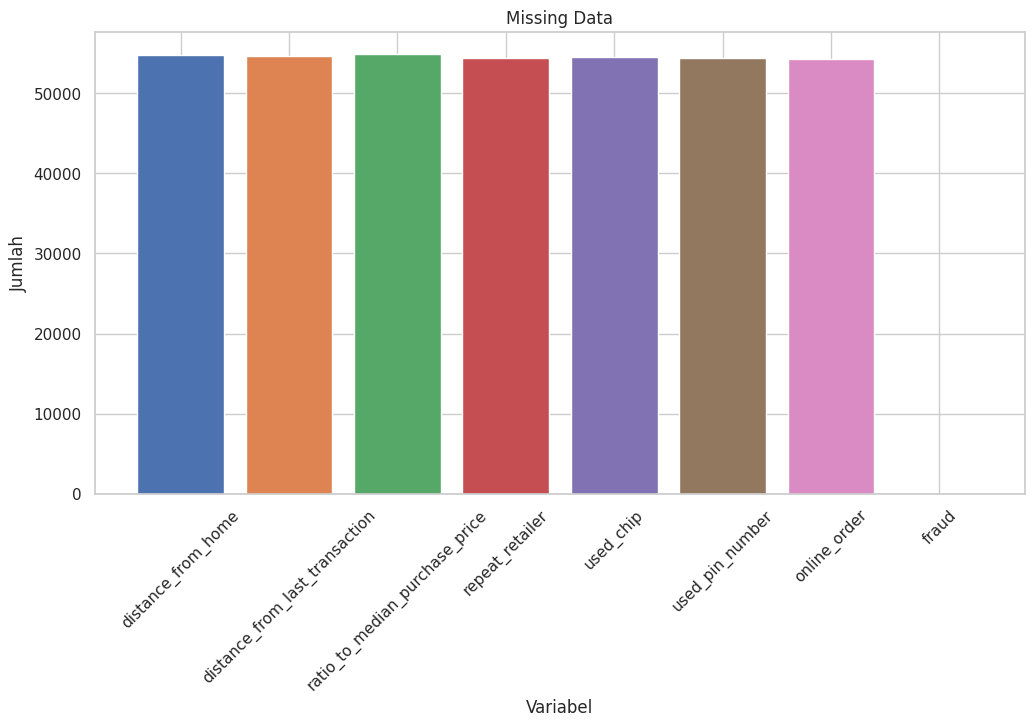

In [236]:
# Membuat count plot
sns.set(style="whitegrid")  # Mengatur gaya plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

# Mengatur gaya plot Seaborn
sns.set(style="whitegrid")

# Membuat plot batang terpisah untuk setiap kunci
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
for key, value in data_missing.items():
    plt.bar(key, value)

# Menambahkan label sumbu dan judul plot
plt.xlabel("Variabel")
plt.ylabel("Jumlah")
plt.title("Missing Data")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar terbaca dengan baik
plt.show()

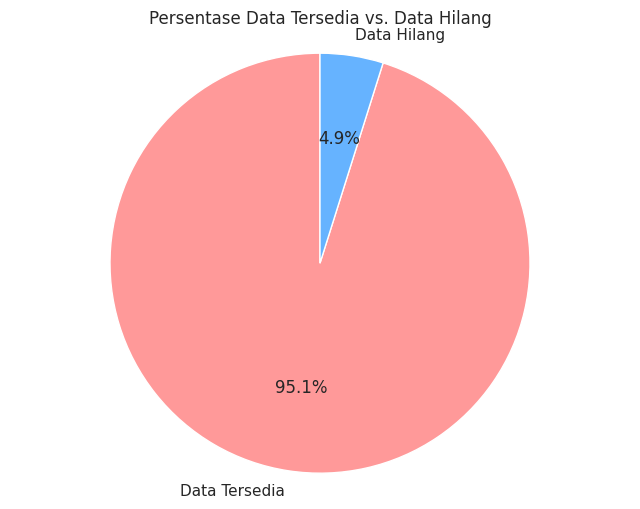

In [237]:

# Hitung jumlah total data yang hilang
total_missing = df.isnull().sum().sum()

# Hitung jumlah total data yang tersedia
total_data = df.size

# Hitung jumlah data yang tersedia
available_data = total_data - total_missing

# Buat data untuk pie chart
labels = ['Data Tersedia', 'Data Hilang']
sizes = [available_data, total_missing]
colors = ['#ff9999','#66b3ff']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Persentase Data Tersedia vs. Data Hilang')
plt.axis('equal')  # Agar lingkaran terlihat sempurna

# Tampilkan pie chart
plt.show()

### Outlier

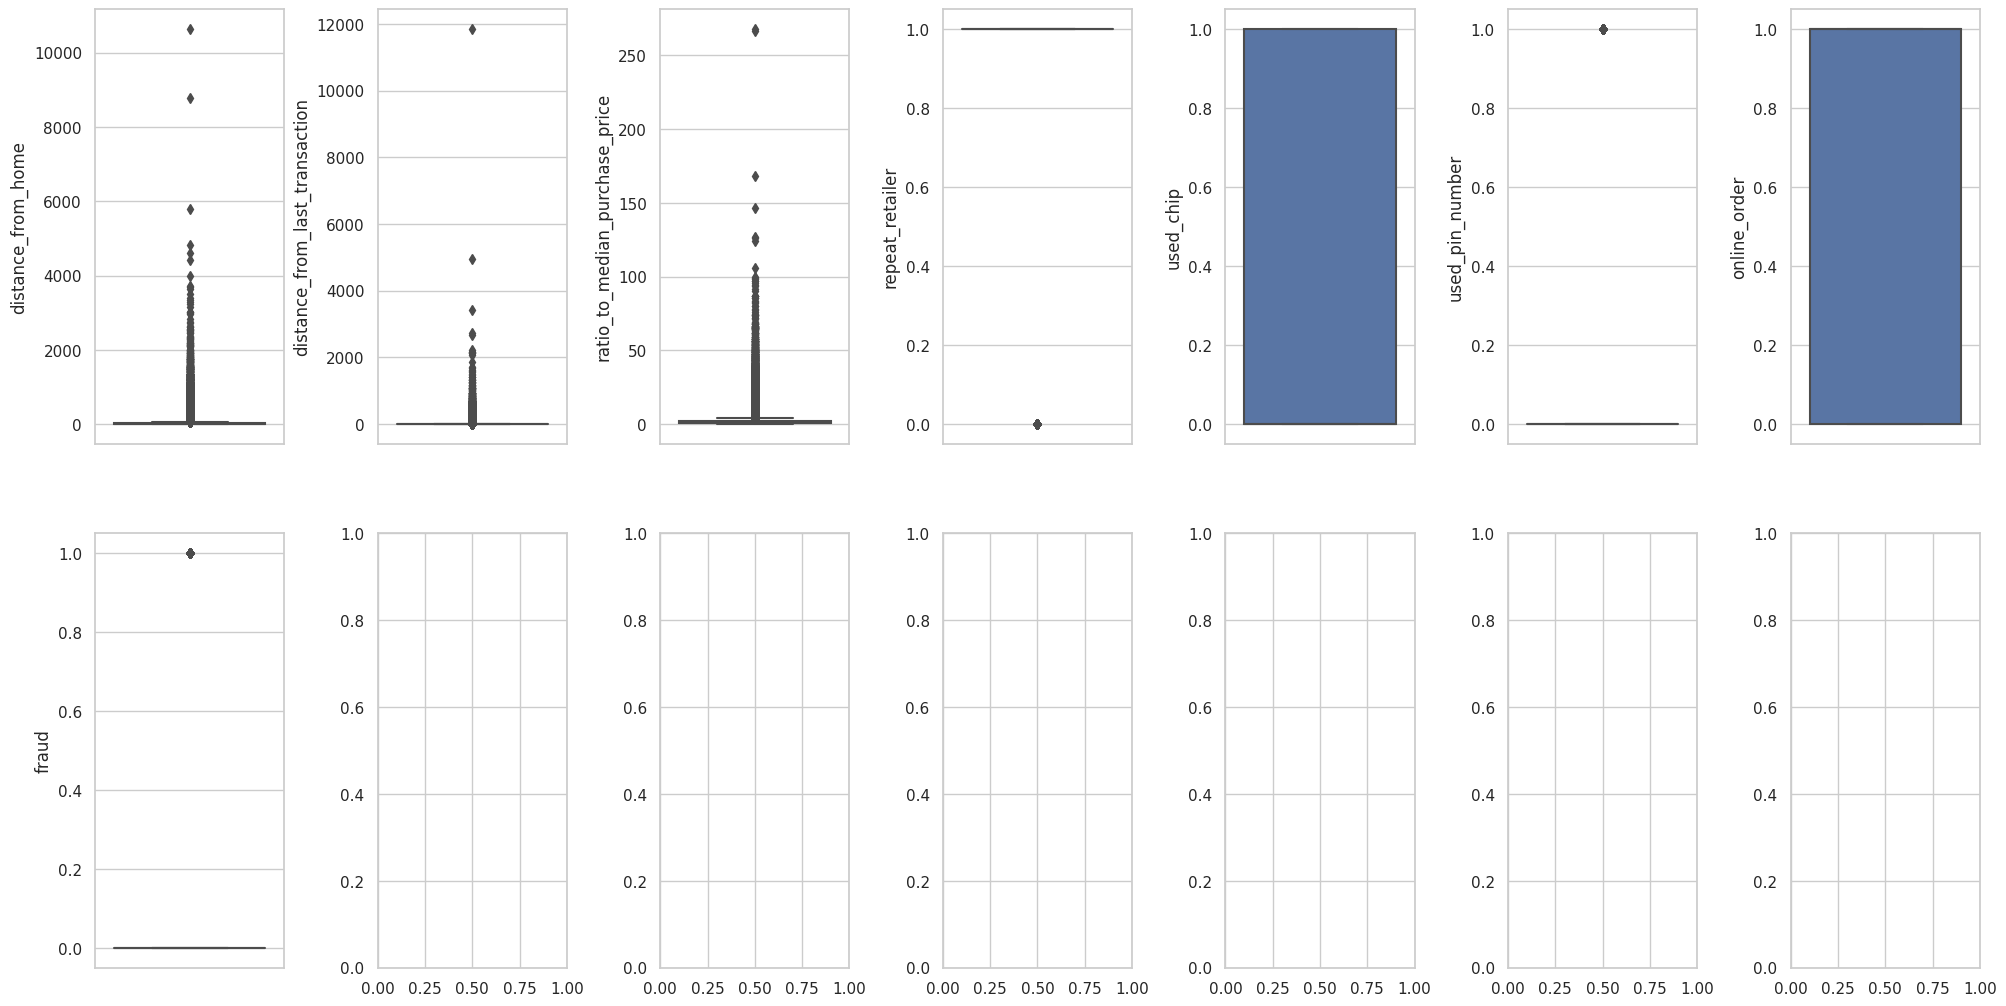

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## MODEL

### Model 1 (Missing Data = 0)

In [239]:
df_model1 = df.copy()

In [240]:
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982519 entries, 763547 to 988548
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              927796 non-null  float64
 1   distance_from_last_transaction  927895 non-null  float64
 2   ratio_to_median_purchase_price  927618 non-null  float64
 3   repeat_retailer                 928076 non-null  float64
 4   used_chip                       928026 non-null  float64
 5   used_pin_number                 928152 non-null  float64
 6   online_order                    928219 non-null  float64
 7   fraud                           982519 non-null  float64
dtypes: float64(8)
memory usage: 67.5 MB


In [241]:
data_missing = df_model1.isnull().sum()
data_missing

distance_from_home                54723
distance_from_last_transaction    54624
ratio_to_median_purchase_price    54901
repeat_retailer                   54443
used_chip                         54493
used_pin_number                   54367
online_order                      54300
fraud                                 0
dtype: int64

<Figure size 1000x600 with 0 Axes>

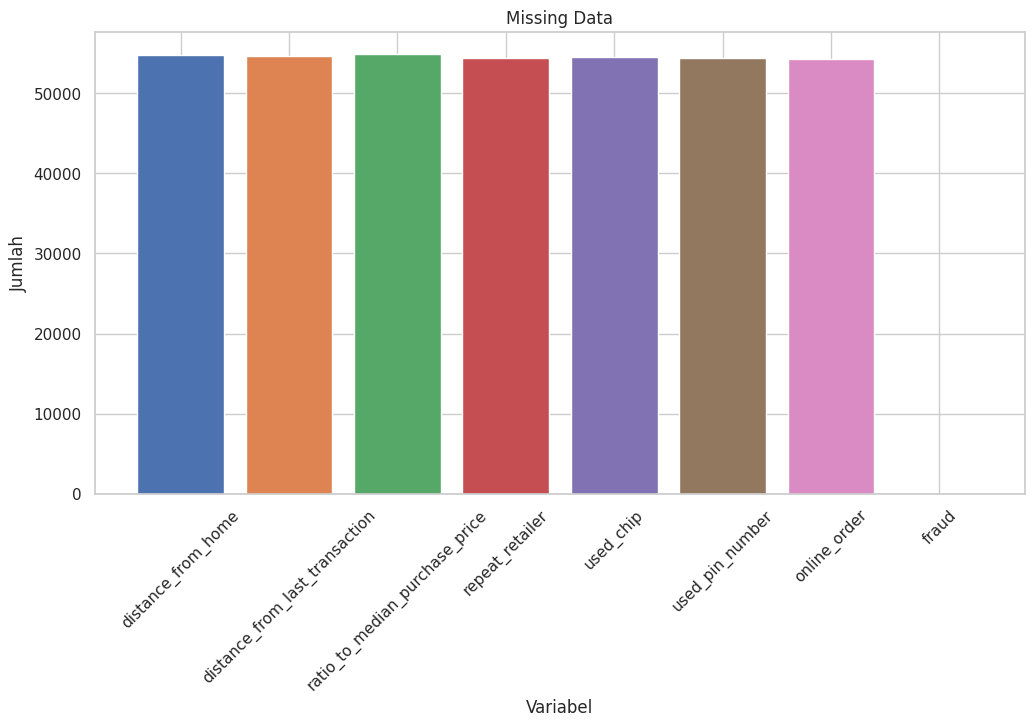

In [242]:
# Membuat count plot
sns.set(style="whitegrid")  # Mengatur gaya plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

# Mengatur gaya plot Seaborn
sns.set(style="whitegrid")

# Membuat plot batang terpisah untuk setiap kunci
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
for key, value in data_missing.items():
    plt.bar(key, value)

# Menambahkan label sumbu dan judul plot
plt.xlabel("Variabel")
plt.ylabel("Jumlah")
plt.title("Missing Data")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar terbaca dengan baik
plt.show()

#### Pre-processing

In [243]:
# Mengisi missing value dengan nilai 0
df_model1.fillna(0, inplace=True)
df_model1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,8.073065,0.614990,0.000000,1.0,0.0,0.0,1.0,0.0
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
157152,8.015637,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
846711,44.997072,10.943190,0.000000,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
593623,29.588257,66.519297,0.072054,1.0,0.0,0.0,1.0,1.0
70103,128.707098,0.308811,1.304773,1.0,0.0,0.0,1.0,1.0
668717,6.920051,0.402661,4.681969,1.0,1.0,0.0,1.0,1.0
28379,24.501468,12.169503,4.306104,1.0,0.0,0.0,1.0,1.0


In [244]:
data_missing = df_model1.isnull().sum()
data_missing

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### Train | Test Split and Scaling

In [245]:
X = df_model1.drop('fraud',axis=1)
y = df_model1['fraud']

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [248]:
scaler = StandardScaler()

In [249]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
log_model = LogisticRegression()

In [252]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [253]:
log_model.coef_

array([[ 0.69294097,  0.46208392,  1.70269944, -0.1163797 , -0.39500469,
        -3.36217743,  1.7516713 ]])

#### Model Performance on Classification Tasks

In [254]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [255]:
y_pred = log_model.predict(scaled_X_test)

In [256]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy1 = accuracy_score(y_test,y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy1))
print("Presisi: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("F1-Score: {:.2f}".format(f11))

Akurasi: 0.95
Presisi: 0.84
Recall: 0.43
F1-Score: 0.57


In [257]:
confusion_matrix(y_test,y_pred)

array([[90665,   566],
       [ 4008,  3013]])

In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     91231
         1.0       0.84      0.43      0.57      7021

    accuracy                           0.95     98252
   macro avg       0.90      0.71      0.77     98252
weighted avg       0.95      0.95      0.95     98252



### Model 2 (Missing Data = Mean)

In [259]:
df_model2 = df.copy()

In [260]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982519 entries, 763547 to 988548
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              927796 non-null  float64
 1   distance_from_last_transaction  927895 non-null  float64
 2   ratio_to_median_purchase_price  927618 non-null  float64
 3   repeat_retailer                 928076 non-null  float64
 4   used_chip                       928026 non-null  float64
 5   used_pin_number                 928152 non-null  float64
 6   online_order                    928219 non-null  float64
 7   fraud                           982519 non-null  float64
dtypes: float64(8)
memory usage: 67.5 MB


In [261]:
data_missing = df_model2.isnull().sum()
data_missing

distance_from_home                54723
distance_from_last_transaction    54624
ratio_to_median_purchase_price    54901
repeat_retailer                   54443
used_chip                         54493
used_pin_number                   54367
online_order                      54300
fraud                                 0
dtype: int64

<Figure size 1000x600 with 0 Axes>

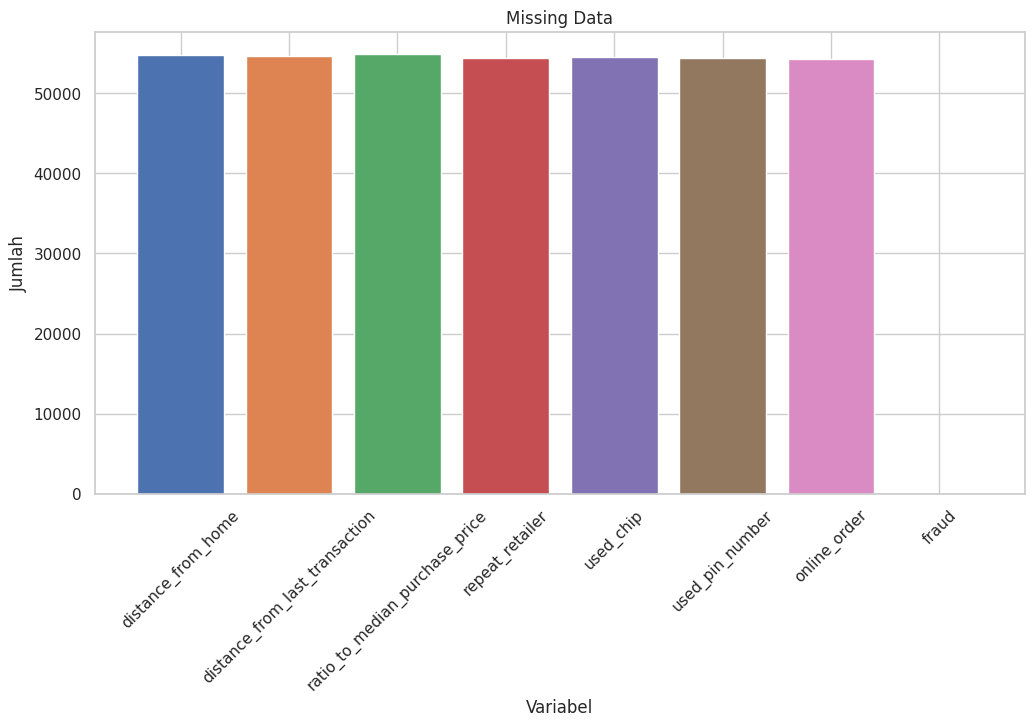

In [262]:
# Membuat count plot
sns.set(style="whitegrid")  # Mengatur gaya plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

# Mengatur gaya plot Seaborn
sns.set(style="whitegrid")

# Membuat plot batang terpisah untuk setiap kunci
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
for key, value in data_missing.items():
    plt.bar(key, value)

# Menambahkan label sumbu dan judul plot
plt.xlabel("Variabel")
plt.ylabel("Jumlah")
plt.title("Missing Data")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar terbaca dengan baik
plt.show()

#### Pre-processing

In [263]:
# Mendapatkan daftar nilai target yang unik
unique_targets = df_model2['fraud'].unique()

# Mengisi nilai yang hilang dengan nilai rata-rata kolom jika nilai target sama
for target_value in unique_targets:
    for column in df_model2.columns[:-1]:  # Exclude the last column (Target column)
        mean_value = df_model2[df_model2['fraud'] == target_value][column].mean()
        df_model2.loc[(df_model2['fraud'] == target_value) & (df_model2[column].isna()), column] = mean_value

# Menampilkan DataFrame yang telah diisi nilai rata-rata
df_model2

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,8.073065,0.614990,1.423590,1.0,0.0,0.0,1.0,0.0
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
157152,8.015637,4.298869,1.423590,1.0,0.0,0.0,1.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
846711,44.997072,10.943190,1.423590,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
593623,29.588257,66.519297,0.072054,1.0,0.0,0.0,1.0,1.0
70103,128.707098,0.308811,1.304773,1.0,0.0,0.0,1.0,1.0
668717,6.920051,0.402661,4.681969,1.0,1.0,0.0,1.0,1.0
28379,24.501468,12.169503,4.306104,1.0,0.0,0.0,1.0,1.0


In [264]:
data_missing = df_model2.isnull().sum()
data_missing

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### Train | Test Split and Scaling

In [265]:
X = df_model2.drop('fraud',axis=1)
y = df_model2['fraud']

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [268]:
scaler = StandardScaler()

In [269]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
log_model = LogisticRegression()

In [272]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [273]:
log_model.coef_

array([[ 0.86378645,  0.5630992 ,  2.19602221, -0.17123049, -0.47707696,
        -5.07291089,  3.25032395]])

#### Model Performance on Classification Tasks

In [274]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [275]:
y_pred = log_model.predict(scaled_X_test)

In [276]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy2 = accuracy_score(y_test,y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy2))
print("Presisi: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("F1-Score: {:.2f}".format(f12))

Akurasi: 0.97
Presisi: 0.90
Recall: 0.59
F1-Score: 0.71


In [277]:
confusion_matrix(y_test,y_pred)

array([[90748,   483],
       [ 2866,  4155]])

In [278]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     91231
         1.0       0.90      0.59      0.71      7021

    accuracy                           0.97     98252
   macro avg       0.93      0.79      0.85     98252
weighted avg       0.96      0.97      0.96     98252



### Model 3 (Missing Data = Drop)

In [279]:
df_model3 = df.copy()

In [280]:
df_model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982519 entries, 763547 to 988548
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              927796 non-null  float64
 1   distance_from_last_transaction  927895 non-null  float64
 2   ratio_to_median_purchase_price  927618 non-null  float64
 3   repeat_retailer                 928076 non-null  float64
 4   used_chip                       928026 non-null  float64
 5   used_pin_number                 928152 non-null  float64
 6   online_order                    928219 non-null  float64
 7   fraud                           982519 non-null  float64
dtypes: float64(8)
memory usage: 67.5 MB


In [281]:
data_missing = df_model3.isnull().sum()
data_missing

distance_from_home                54723
distance_from_last_transaction    54624
ratio_to_median_purchase_price    54901
repeat_retailer                   54443
used_chip                         54493
used_pin_number                   54367
online_order                      54300
fraud                                 0
dtype: int64

<Figure size 1000x600 with 0 Axes>

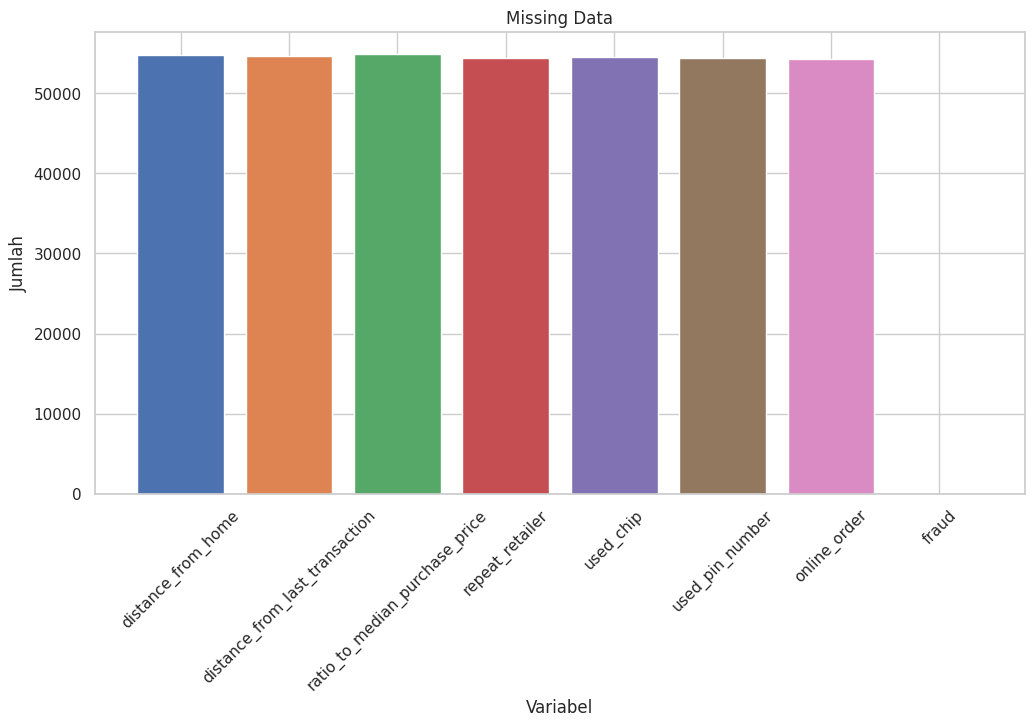

In [282]:
# Membuat count plot
sns.set(style="whitegrid")  # Mengatur gaya plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

# Mengatur gaya plot Seaborn
sns.set(style="whitegrid")

# Membuat plot batang terpisah untuk setiap kunci
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
for key, value in data_missing.items():
    plt.bar(key, value)

# Menambahkan label sumbu dan judul plot
plt.xlabel("Variabel")
plt.ylabel("Jumlah")
plt.title("Missing Data")

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar terbaca dengan baik
plt.show()

#### Pre-processing

In [283]:
# Menghapus baris yang mengandung nilai yang hilang
df_model3 = df_model3.dropna()

# Menampilkan DataFrame yang telah diisi nilai rata-rata
df_model3

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
23634,31.994433,5.808574,1.186485,1.0,0.0,1.0,0.0,0.0
238071,6.230256,0.796154,0.206875,1.0,1.0,0.0,0.0,0.0
955968,161.210779,1.650110,5.323023,1.0,1.0,1.0,0.0,0.0
94230,23.725272,5.497818,0.796666,1.0,1.0,0.0,1.0,0.0
496328,8.134807,0.212083,1.948270,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
593623,29.588257,66.519297,0.072054,1.0,0.0,0.0,1.0,1.0
70103,128.707098,0.308811,1.304773,1.0,0.0,0.0,1.0,1.0
668717,6.920051,0.402661,4.681969,1.0,1.0,0.0,1.0,1.0
28379,24.501468,12.169503,4.306104,1.0,0.0,0.0,1.0,1.0


In [284]:
df_model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659078 entries, 23634 to 988548
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              659078 non-null  float64
 1   distance_from_last_transaction  659078 non-null  float64
 2   ratio_to_median_purchase_price  659078 non-null  float64
 3   repeat_retailer                 659078 non-null  float64
 4   used_chip                       659078 non-null  float64
 5   used_pin_number                 659078 non-null  float64
 6   online_order                    659078 non-null  float64
 7   fraud                           659078 non-null  float64
dtypes: float64(8)
memory usage: 45.3 MB


In [285]:
data_missing = df_model3.isnull().sum()
data_missing

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### Train | Test Split and Scaling

In [286]:
X = df_model3.drop('fraud',axis=1)
y = df_model3['fraud']

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [289]:
scaler = StandardScaler()

In [290]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
log_model = LogisticRegression()

In [293]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [294]:
log_model.coef_

array([[ 0.92963519,  0.53962412,  2.25210837, -0.18367984, -0.49287619,
        -4.76320284,  3.3615552 ]])

#### Model Performance on Classification Tasks

In [295]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [296]:
y_pred = log_model.predict(scaled_X_test)

In [297]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy3 = accuracy_score(y_test,y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy3))
print("Presisi: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("F1-Score: {:.2f}".format(f13))

Akurasi: 0.96
Presisi: 0.89
Recall: 0.56
F1-Score: 0.68


In [298]:
confusion_matrix(y_test,y_pred)

array([[60892,   332],
       [ 2073,  2611]])

In [299]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     61224
         1.0       0.89      0.56      0.68      4684

    accuracy                           0.96     65908
   macro avg       0.93      0.78      0.83     65908
weighted avg       0.96      0.96      0.96     65908



### Model 4 (Balance Data)

In [300]:
df_model4 = df_model2.copy()

In [301]:
df_model4["fraud"].unique()

array([0., 1.])

In [302]:
df_model4["fraud"].value_counts()

0.0    912597
1.0     69922
Name: fraud, dtype: int64

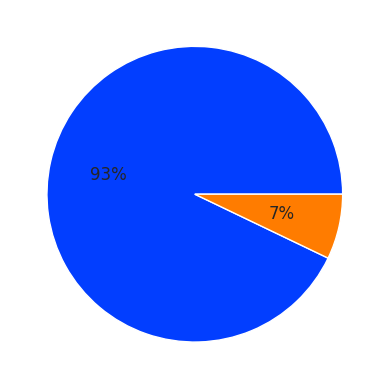

In [303]:
# declaring data
data = df_model4["fraud"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

#### Pre-processing

In [304]:
# Hitung jumlah data dengan label target 0 dan 1
count_class_0, count_class_1 = df_model4['fraud'].value_counts()

# Pisahkan data berdasarkan label target
df_class_0 = df_model4[df_model4['fraud'] == 0]
df_class_1 = df_model4[df_model4['fraud'] == 1]

# Oversampling data dengan label target 0
df_class_0_oversampled = df_class_0.sample(count_class_1, replace=True, random_state=42)

# Gabungkan data oversampled dengan data label target 1
df_balanced = pd.concat([df_class_0_oversampled, df_class_1], axis=0)

# Shuffle data untuk memastikan urutan acak
df_model4 = df_balanced.sample(frac=1, random_state=42)

# Hasil data yang sudah seimbang
df_model4

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
897158,321.949322,1.356647,0.876267,1.000000,0.00000,0.000000,1.0,1.0
327041,5.988347,1.092326,1.065696,1.000000,0.00000,0.110012,1.0,0.0
331928,31.961893,0.263178,0.505600,1.000000,0.00000,0.000000,0.0,0.0
515015,22.832069,0.180567,0.186008,1.000000,0.00000,0.000000,0.0,0.0
367726,9.475239,2.618579,1.069752,1.000000,0.35923,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...
906789,15.878729,0.199335,5.010288,1.000000,0.00000,0.000000,1.0,1.0
634484,4.980317,0.118522,5.479149,1.000000,0.00000,0.000000,1.0,1.0
531173,111.123727,2.249119,6.609031,0.879825,1.00000,0.000000,1.0,1.0
577767,40.095051,111.291707,1.881796,1.000000,0.00000,0.000000,1.0,1.0


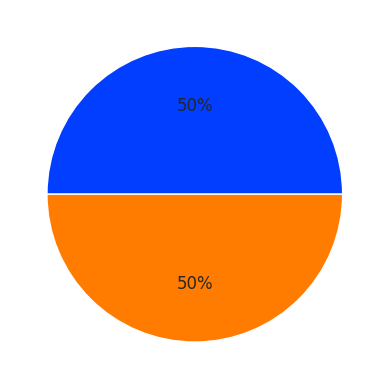

In [305]:
# declaring data
data = df_model4["fraud"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

#### Train | Test Split and Scaling

In [306]:
X = df_model4.drop('fraud',axis=1)
y = df_model4['fraud']

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [309]:
scaler = StandardScaler()

In [310]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [311]:
from sklearn.linear_model import LogisticRegression

In [312]:
log_model = LogisticRegression()

In [313]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [314]:
log_model.coef_

array([[ 2.79281524,  2.04012451,  5.36828779, -0.40459304, -0.56938283,
        -2.49671143,  1.95495959]])

#### Model Performance on Classification Tasks

In [315]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [316]:
y_pred = log_model.predict(scaled_X_test)

In [317]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy4 = accuracy_score(y_test,y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)
f14 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy4))
print("Presisi: {:.2f}".format(precision4))
print("Recall: {:.2f}".format(recall4))
print("F1-Score: {:.2f}".format(f14))

Akurasi: 0.94
Presisi: 0.93
Recall: 0.94
F1-Score: 0.94


In [318]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      7004
         1.0       0.93      0.94      0.94      6981

    accuracy                           0.94     13985
   macro avg       0.94      0.94      0.94     13985
weighted avg       0.94      0.94      0.94     13985



### Model 5 (Menghapus Outlier)

In [359]:
df_model5 = df_model2.copy()

In [360]:
df_model5.shape

(982519, 8)

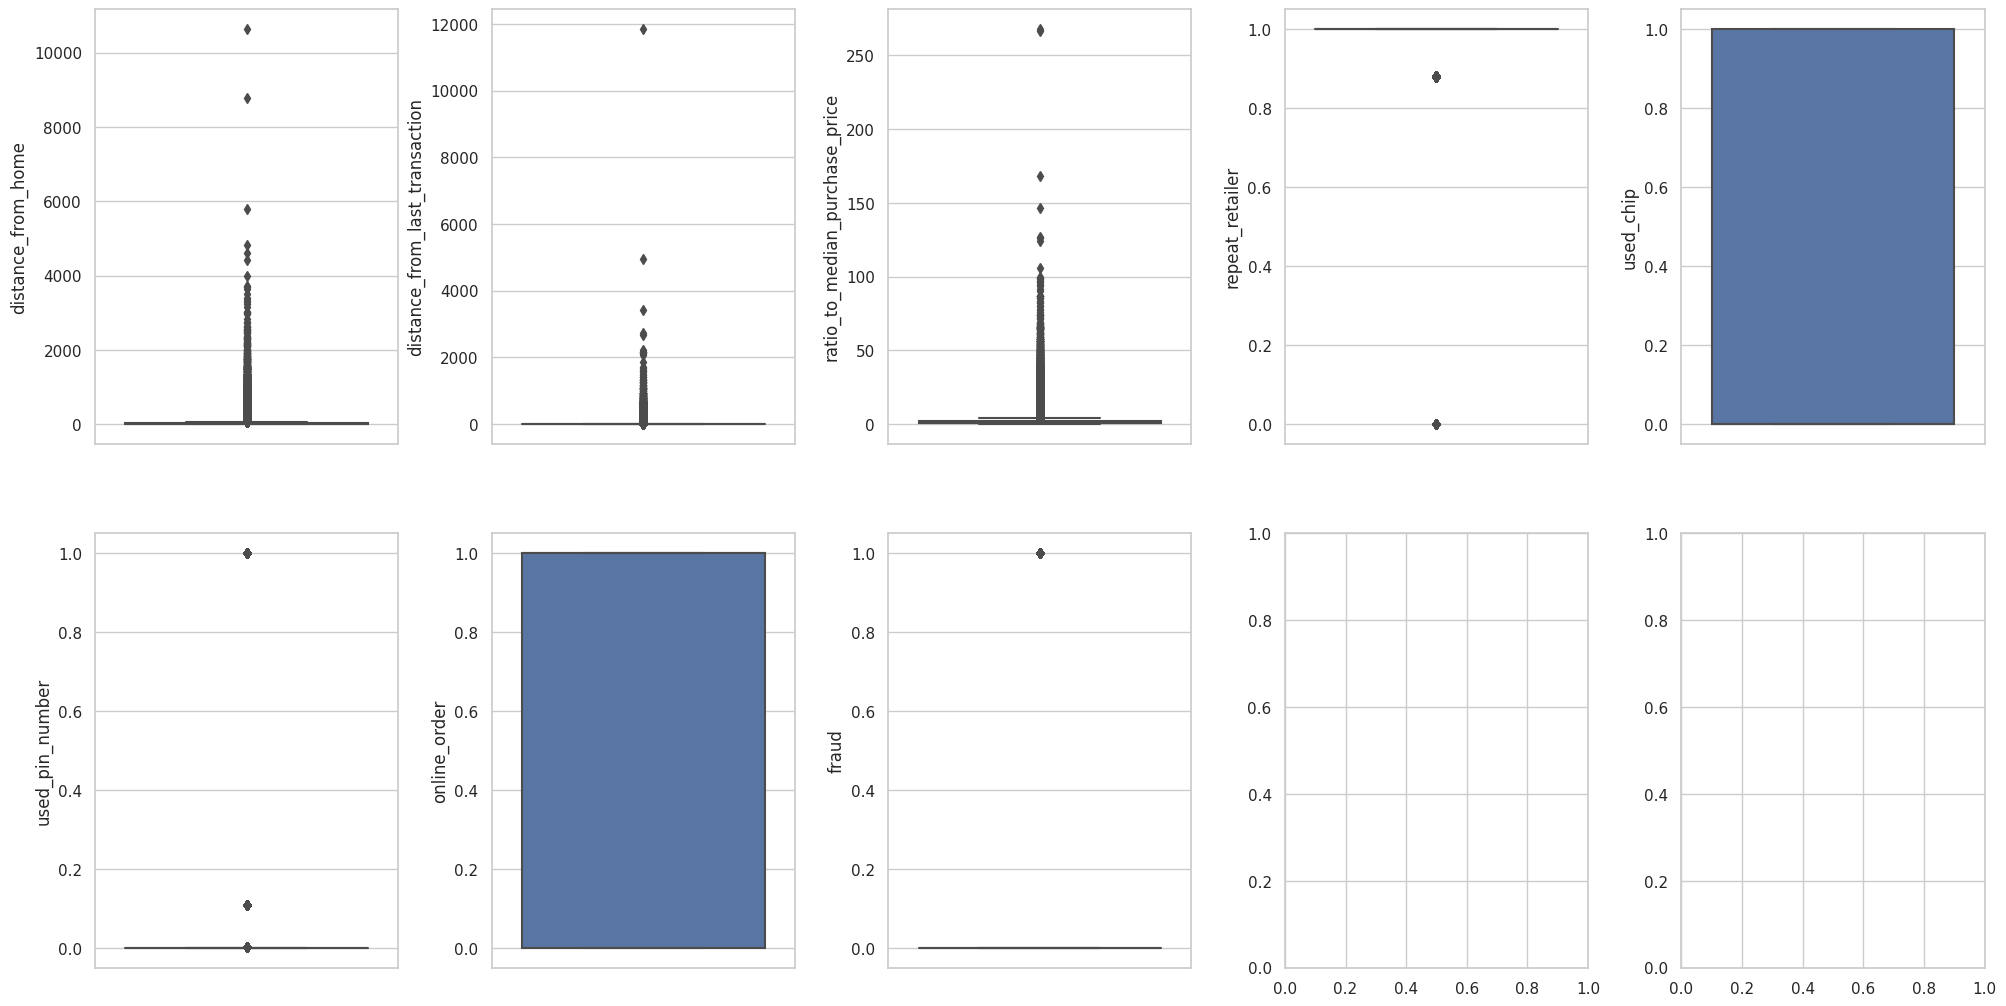

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_model5.items():
    sns.boxplot(y=k, data=df_model5, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Pre-processing

In [362]:
# Mengecek dan menghapus outlier di semua kolom kecuali kolom 'label'
numerical_cols = df_model5.columns[:-1]  # Mengambil semua kolom kecuali kolom terakhir
num_plots = len(numerical_cols)

# Visualisasi boxplot untuk setiap kolom numerik dan menghapus outlier
for i, col in enumerate(numerical_cols):
    # Mengecek outlier dengan IQR
    Q1 = df_model5[col].quantile(0.25)
    Q3 = df_model5[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df_model5 = df_model5[(df_model5[col] >= lower_bound) & (df_model5[col] <= upper_bound)]


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [363]:
df_model5.shape

(507395, 8)

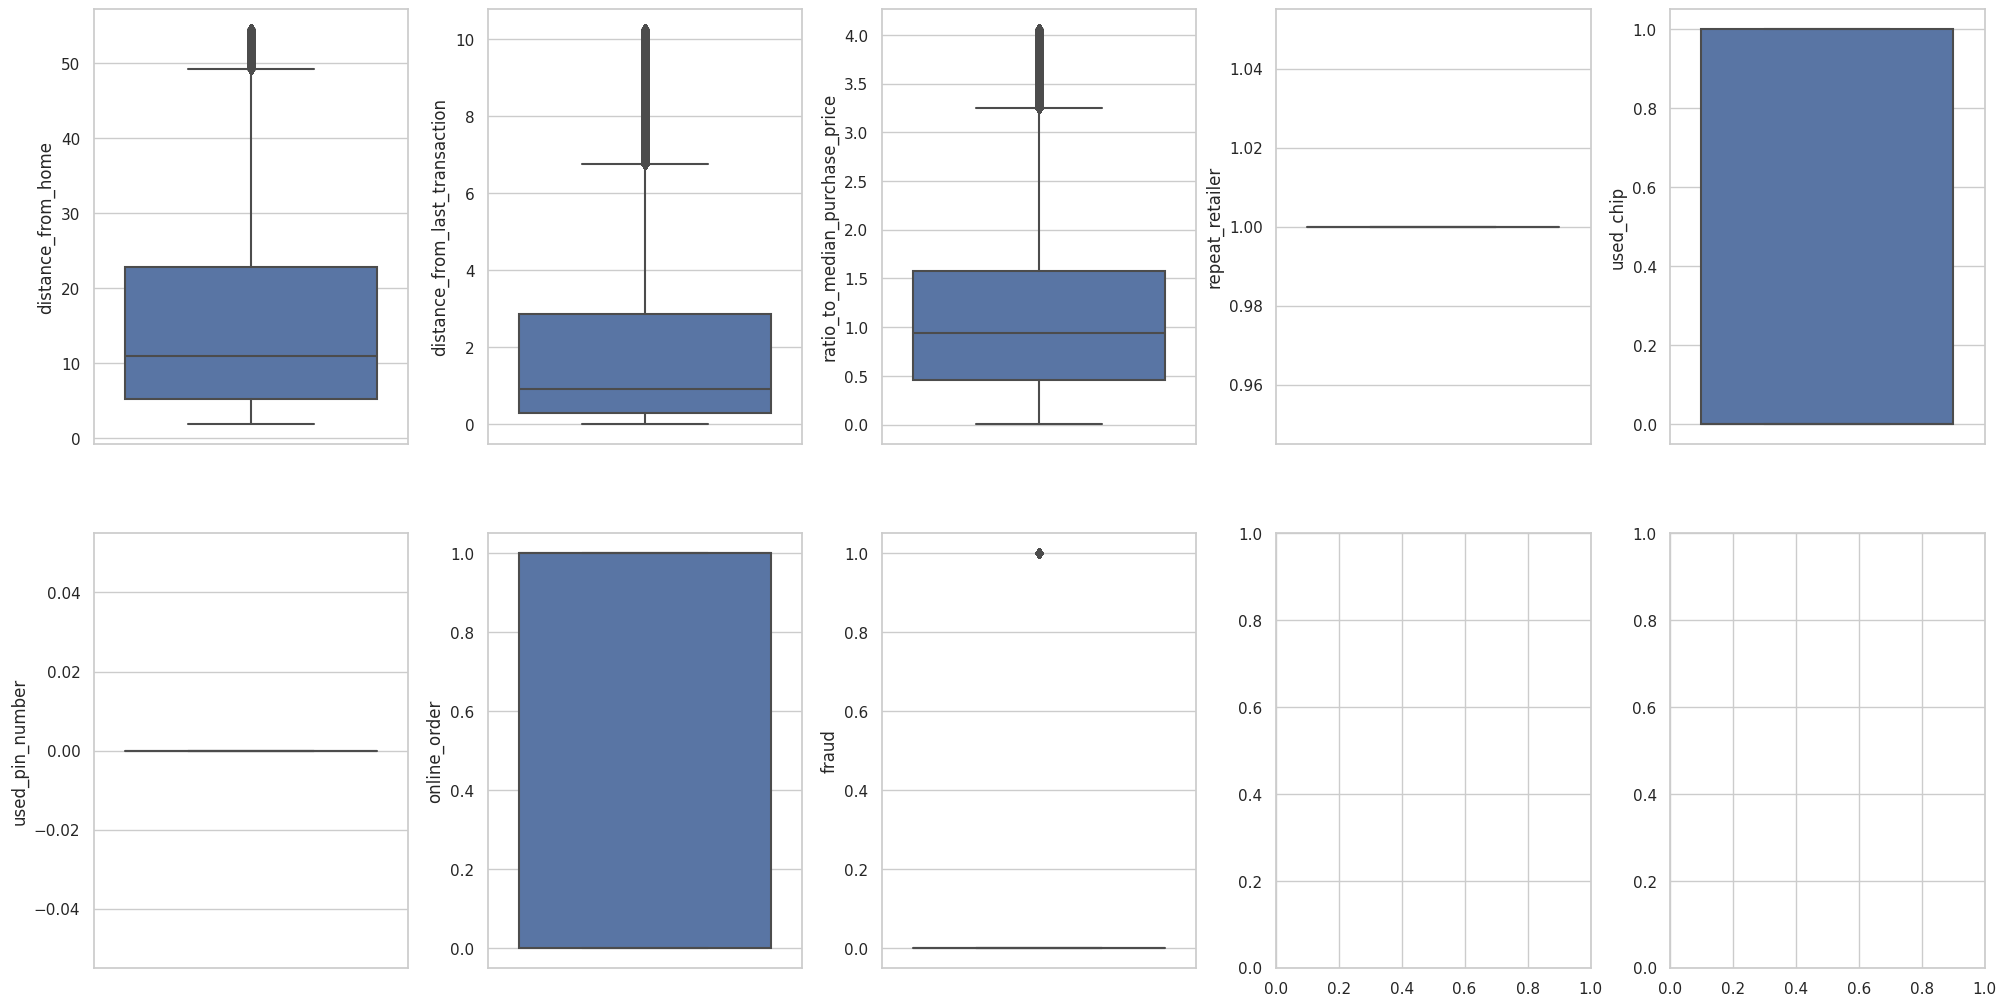

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_model5.items():
    sns.boxplot(y=k, data=df_model5, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [365]:
print(df.shape)
print(df_model5.shape)

(982519, 8)
(507395, 8)


#### Train | Test Split and Scaling

In [366]:
X = df_model5.drop('fraud',axis=1)
y = df_model5['fraud']

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [369]:
scaler = StandardScaler()

In [370]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [371]:
from sklearn.linear_model import LogisticRegression

In [372]:
log_model = LogisticRegression()

In [373]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [374]:
log_model.coef_

array([[-1.93347141e-02, -7.40991009e-02,  2.07145855e+01,
         0.00000000e+00, -1.08272197e-01,  0.00000000e+00,
         3.11154697e+00]])

#### Model Performance on Classification Tasks

In [375]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [376]:
y_pred = log_model.predict(scaled_X_test)

In [377]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy5 = accuracy_score(y_test,y_pred)
precision5 = precision_score(y_test, y_pred)
recall5 = recall_score(y_test, y_pred)
f15 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy5))
print("Presisi: {:.2f}".format(precision5))
print("Recall: {:.2f}".format(recall5))
print("F1-Score: {:.2f}".format(f15))

Akurasi: 1.00
Presisi: 1.00
Recall: 0.40
F1-Score: 0.58


In [379]:
confusion_matrix(y_test,y_pred)

array([[50688,     0],
       [   31,    21]])

In [380]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50688
         1.0       1.00      0.40      0.58        52

    accuracy                           1.00     50740
   macro avg       1.00      0.70      0.79     50740
weighted avg       1.00      1.00      1.00     50740



### Model 6 (Balance Data + Menghapus Outlier)

In [339]:
df_model6 = df_model4.copy()

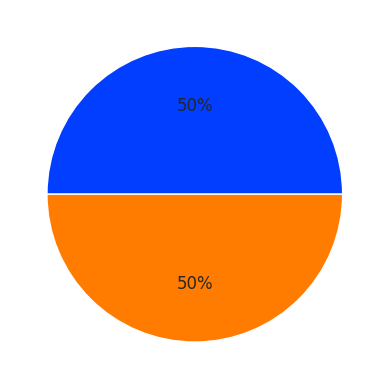

In [340]:
# declaring data
data = df_model6["fraud"].value_counts()
# keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

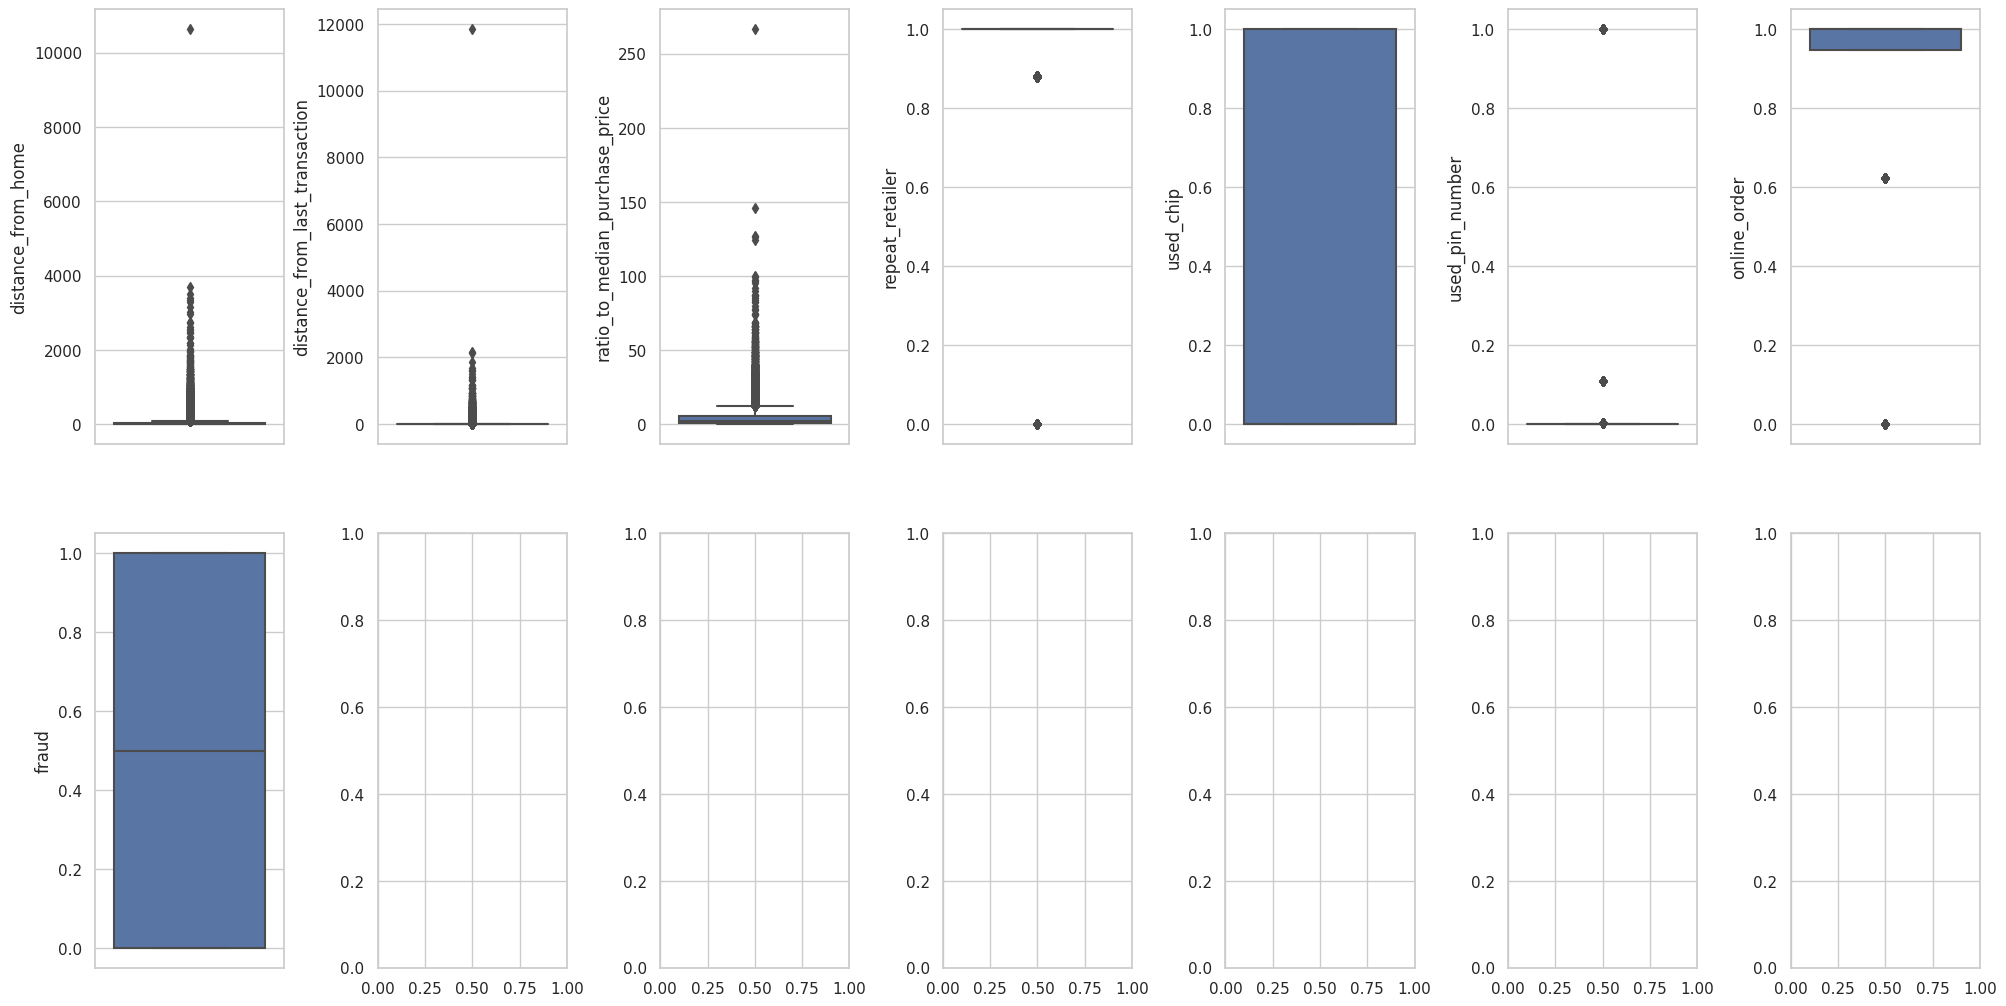

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df_model4, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [342]:
# Mengecek dan menghapus outlier di semua kolom kecuali kolom 'label'
numerical_cols = df_model6.columns[:-1]  # Mengambil semua kolom kecuali kolom terakhir
num_plots = len(numerical_cols)

# Visualisasi boxplot untuk setiap kolom numerik dan menghapus outlier
for i, col in enumerate(numerical_cols):
    # Mengecek outlier dengan IQR
    Q1 = df_model6[col].quantile(0.25)
    Q3 = df_model6[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df_model6 = df_model6[(df_model6[col] >= lower_bound) & (df_model6[col] <= upper_bound)]


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

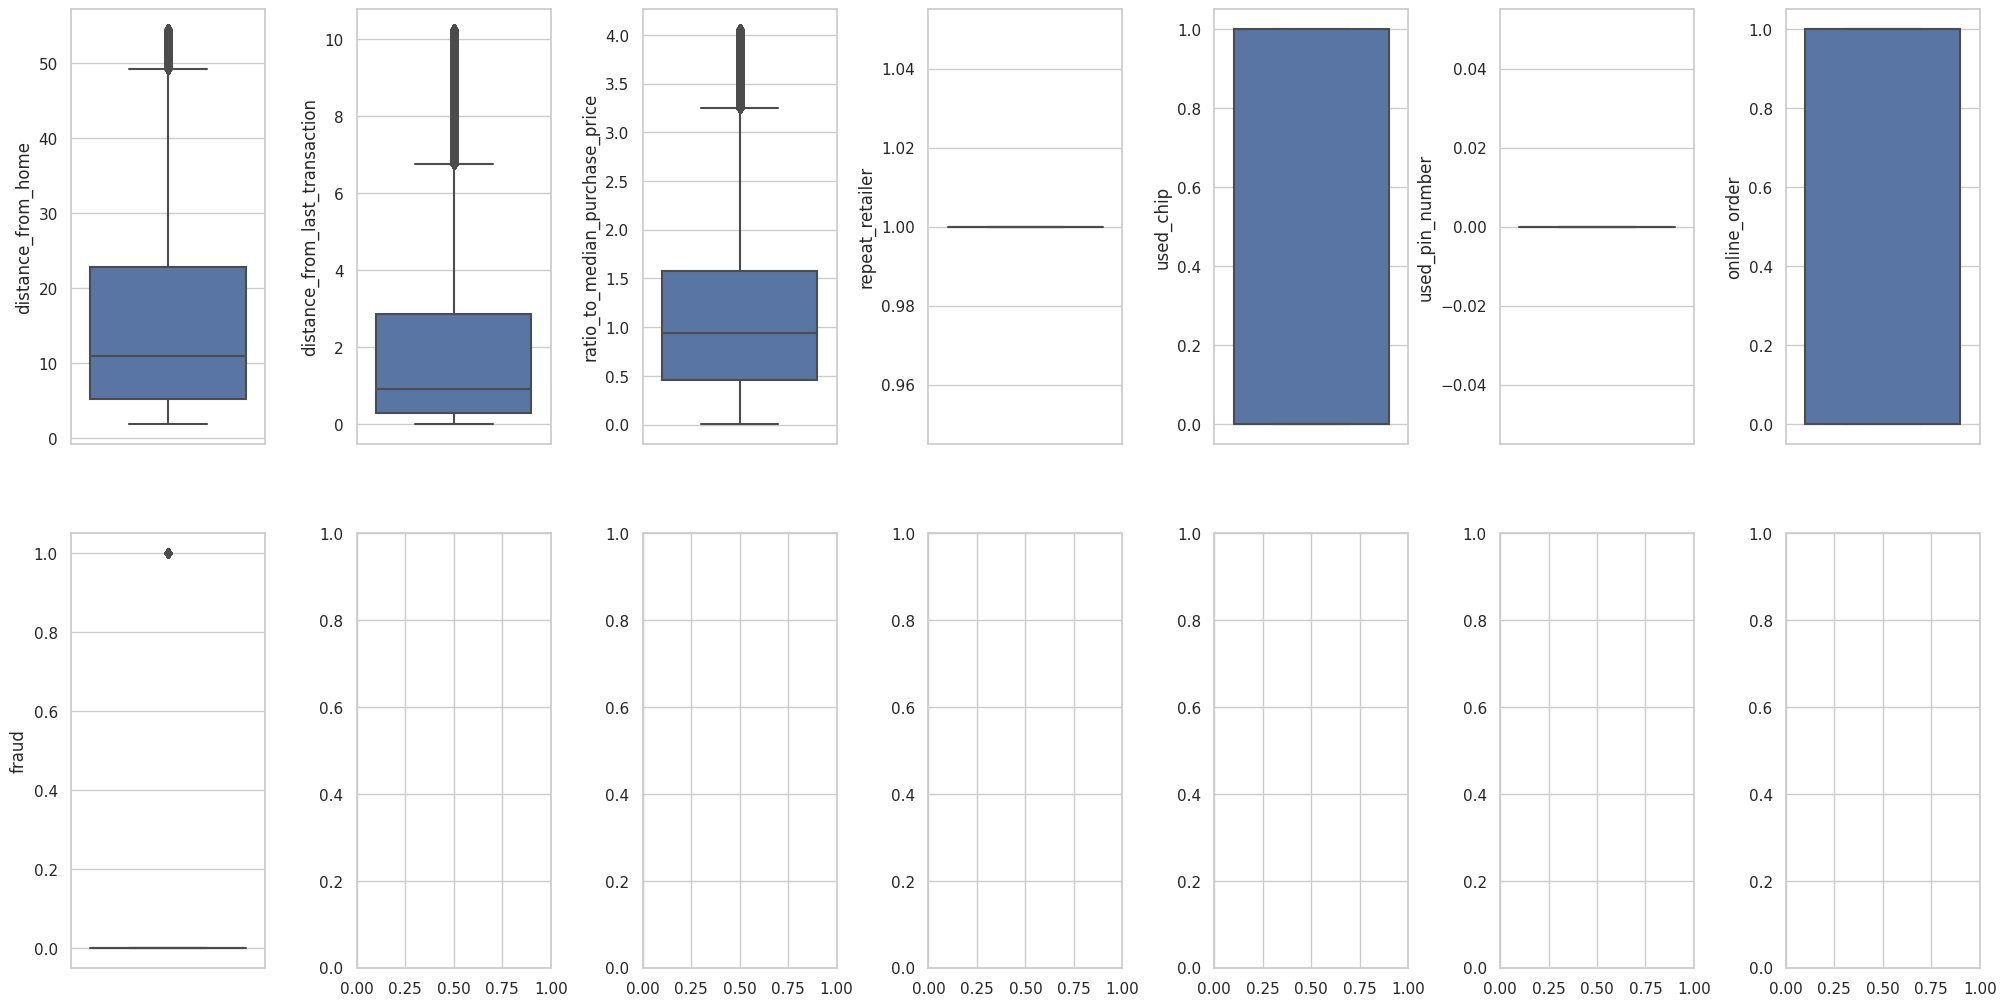

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_model6.items():
    sns.boxplot(y=k, data=df_model5, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [344]:
print(df.shape)
print(df_model6.shape)

(982519, 8)
(53493, 8)


#### Train | Test Split and Scaling

In [345]:
X = df_model6.drop('fraud',axis=1)
y = df_model6['fraud']

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [348]:
scaler = StandardScaler()

In [349]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Modelling - Logistic

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
log_model = LogisticRegression()

In [352]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [353]:
log_model.coef_

array([[ 0.96997531, -0.05308554,  8.01474389,  0.        , -0.2483081 ,
         0.        , -1.64304097]])

#### Model Performance on Classification Tasks

In [354]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [355]:
y_pred = log_model.predict(scaled_X_test)

In [356]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung Presisi, Recall, dan F1-Score
accuracy6 = accuracy_score(y_test,y_pred)
precision6 = precision_score(y_test, y_pred)
recall6 = recall_score(y_test, y_pred)
f16 = f1_score(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy6))
print("Presisi: {:.2f}".format(precision6))
print("Recall: {:.2f}".format(recall6))
print("F1-Score: {:.2f}".format(f16))

Akurasi: 0.98
Presisi: 0.97
Recall: 0.98
F1-Score: 0.98


In [357]:
confusion_matrix(y_test,y_pred)

array([[2449,   80],
       [  45, 2776]])

In [358]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2529
         1.0       0.97      0.98      0.98      2821

    accuracy                           0.98      5350
   macro avg       0.98      0.98      0.98      5350
weighted avg       0.98      0.98      0.98      5350

